<a href="https://colab.research.google.com/github/pmannil/flightdelay_ml/blob/master/module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from google.colab import files

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
df=pd.read_csv('/content/gdrive/My Drive/ml/1.csv')

In [5]:
df.head()

,Cloudcover,DewPointF,Humidity,Pressure,Visibilty,WeatherCode,WindChillF,WindDirDegree,WindGustKmph,WindSpeedKmph,airport,date,precipMM,tempF,time,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,nearest_hoursArr,nearest_hoursDep
0,57,70,89,1021,9,176,74,147,10,5,MCO,2016-01-01,2.5,74,0,2016,1,1,1,2016-01-01,13204,MCO,13303,MIA,1630,0,0.0,0.0,1739,0,0.0,0.0,0,0
1,87,70,97,1019,6,302,71,226,7,4,MCO,2016-01-01,3.4,71,500,2016,1,1,1,2016-01-01,13204,MCO,13303,MIA,500,503,3.0,0.0,603,559,0.0,0.0,600,500
2,87,70,97,1019,6,302,71,226,7,4,MCO,2016-01-01,3.4,71,500,2016,1,1,1,2016-01-01,13204,MCO,11618,EWR,530,527,0.0,0.0,759,741,0.0,0.0,800,500
3,84,71,97,1019,5,302,71,240,6,3,MCO,2016-01-01,2.1,72,600,2016,1,1,1,2016-01-01,13204,MCO,11298,DFW,600,612,12.0,0.0,801,800,0.0,0.0,800,600
4,84,71,97,1019,5,302,71,240,6,3,MCO,2016-01-01,2.1,72,600,2016,1,1,1,2016-01-01,13204,MCO,12478,JFK,604,625,21.0,1.0,830,850,20.0,1.0,900,600


In [0]:
pf1=df.drop(['nearest_hoursArr', 'nearest_hoursDep'], axis=1)

In [0]:
pf1.head()

In [9]:
pf1.shape

(1438104, 32)

In [0]:
need=pf1.drop(["airport","date","DepTime","ArrTime","DepDelayMinutes","ArrDelayMinutes","ArrDel15","DepDel15","FlightDate"],axis=1)

In [0]:
k = LabelEncoder()
c = k.fit_transform(need["Dest"])
need["Dest"] = c
c = k.fit_transform(need["Origin"])
need["Origin"] = c
c = k.fit_transform(need["WeatherCode"])
need["WeatherCode"] = c
f=np.asarray(need)

In [13]:
pf1['DepDel15']=pf1.DepDel15.astype(int)
l=np.asarray(pf1["DepDel15"])
l

array([0, 0, 0, ..., 1, 0, 0])

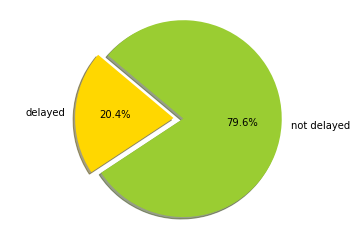

In [14]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'delayed','not delayed'
sizes = [293194,1144910]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [0]:
need.to_csv("/content/gdrive/My Drive/4.csv")

In [0]:
f_train, f_test, l_train, l_test = train_test_split(f, l, test_size=0.20, random_state=42)

**EXTRA TREES**

In [17]:
#before sampling
et = ExtraTreesClassifier()
et.fit(f_train,l_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [18]:
pred = et.predict(f_test)
precision = precision_score(l_test, pred, average="weighted")
recall = recall_score(l_test, pred, average="weighted")
f1 = f1_score(l_test, pred, average="weighted")
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1 Score:", f1)

Precision: 0.8382571472721602
Recall: 0.8502647581365755
F1 Score: 0.8367722775480795


In [19]:
print(classification_report(l_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91    228878
           1       0.71      0.45      0.55     58743

    accuracy                           0.85    287621
   macro avg       0.79      0.70      0.73    287621
weighted avg       0.84      0.85      0.84    287621



In [20]:
#oversampled output
sos = SMOTE(random_state=42)
x, y = sos.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
rg =ExtraTreesClassifier()
rg.fit(f_train,l_train)
pred1 = rg.predict(f_test)
precision1 = precision_score(l_test, pred1, average="weighted")
recall1 = recall_score(l_test, pred1, average="weighted")
f1 = f1_score(l_test, pred1, average="weighted")
print ("Precision:", precision1)
print ("Recall:", recall1)
print ("F1 Score:", f1)
print(classification_report(l_test, pred1))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision: 0.9052279714518279
Recall: 0.9033482981195028
F1 Score: 0.9032436788786299
              precision    recall  f1-score   support

           0       0.88      0.94      0.91    228508
           1       0.93      0.87      0.90    229456

    accuracy                           0.90    457964
   macro avg       0.91      0.90      0.90    457964
weighted avg       0.91      0.90      0.90    457964



In [21]:

# Random Undersampling
ru = RandomUnderSampler(random_state=42)
x, y = ru.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
r =ExtraTreesClassifier()
r.fit(f_train,l_train)
pred2 = r.predict(f_test)
precision2 = precision_score(l_test, pred2, average="weighted")
recall2 = recall_score(l_test, pred2, average="weighted")
f1 = f1_score(l_test, pred2, average="weighted")
print ("Precision:", precision2)
print ("Recall:", recall2)
print ("F1 Score:", f1)
print(classification_report(l_test, pred2))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision: 0.7365131994736223
Recall: 0.7333771039751701
F1 Score: 0.7325180131310092
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     58571
           1       0.76      0.68      0.72     58707

    accuracy                           0.73    117278
   macro avg       0.74      0.73      0.73    117278
weighted avg       0.74      0.73      0.73    117278



**RANDOM FOREST**

In [27]:
#before sampling
ran = RandomForestClassifier()
ran.fit(f_train,l_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
pred3 = ran.predict(f_test)
precision3 = precision_score(l_test, pred3, average="weighted")
recall3 = recall_score(l_test, pred3, average="weighted")
f1 = f1_score(l_test, pred3, average="weighted")
print ("Precision:", precision3)
print ("Recall:", recall3)
print ("F1 Score:", f1)
print(classification_report(l_test, pred3))

Precision: 0.8034782658048822
Recall: 0.8003802929790753
F1 Score: 0.7998850201906113
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     58571
           1       0.83      0.75      0.79     58707

    accuracy                           0.80    117278
   macro avg       0.80      0.80      0.80    117278
weighted avg       0.80      0.80      0.80    117278



In [29]:
#oversampled output
sos = SMOTE(random_state=42)
x, y = sos.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
r1 = RandomForestClassifier()
r1.fit(f_train,l_train)
pred4 = r1.predict(f_test)
precision4 = precision_score(l_test, pred4, average="weighted")
recall4 = recall_score(l_test, pred4, average="weighted")
f1 = f1_score(l_test, pred4, average="weighted")
print ("Precision:", precision4)
print ("Recall:", recall4)
print ("F1 Score:", f1)
print(classification_report(l_test, pred4))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision: 0.9135768999850408
Recall: 0.9103947035138134
F1 Score: 0.910230989224468
              precision    recall  f1-score   support

           0       0.88      0.95      0.91    228508
           1       0.95      0.87      0.91    229456

    accuracy                           0.91    457964
   macro avg       0.91      0.91      0.91    457964
weighted avg       0.91      0.91      0.91    457964



In [30]:

# Random Undersampling
ru = RandomUnderSampler(random_state=42)
x, y = ru.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
r2 =RandomForestClassifier()
r2.fit(f_train,l_train)
pred5 = r2.predict(f_test)
precision5 = precision_score(l_test, pred5, average="weighted")
recall5 = recall_score(l_test, pred5, average="weighted")
f1 = f1_score(l_test, pred5, average="weighted")
print ("Precision:", precision5)
print ("Recall:", recall5)
print ("F1 Score:", f1)
print(classification_report(l_test, pred5))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision: 0.7949846637622632
Recall: 0.7921775610088849
F1 Score: 0.7916977877757136
              precision    recall  f1-score   support

           0       0.77      0.84      0.80     58571
           1       0.82      0.74      0.78     58707

    accuracy                           0.79    117278
   macro avg       0.79      0.79      0.79    117278
weighted avg       0.79      0.79      0.79    117278



**LOGISTIC REGRESSION**

In [0]:
#before sampling
lg = LogisticRegression()
lg.fit(f_train,l_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = lg.predict(f_test)
precision = precision_score(l_test, pred, average="weighted")
recall = recall_score(l_test, pred, average="weighted")
f1 = f1_score(l_test, pred, average="weighted")
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1 Score:", f1)
print(classification_report(l_test, pred))

Precision: 0.6153303766290811
Recall: 0.6150046728563817
F1 Score: 0.6146723066459795
              precision    recall  f1-score   support

           0       0.62      0.59      0.60    228508
           1       0.61      0.64      0.63    229456

    accuracy                           0.62    457964
   macro avg       0.62      0.61      0.61    457964
weighted avg       0.62      0.62      0.61    457964



In [0]:
# undersampled output
rus = RandomUnderSampler(random_state=42)
x, y = rus.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
lg = LogisticRegression()
lg.fit(f_train,l_train)
pred = rg.predict(f_test)
precision = precision_score(l_test, pred, average="weighted")
recall = recall_score(l_test, pred, average="weighted")
f1 = f1_score(l_test, pred, average="weighted")
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1 Score:", f1)
print(classification_report(l_test, pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Precision: 0.9331022704423136
Recall: 0.9261157250294173
F1 Score: 0.925822436409822
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     58571
           1       0.99      0.86      0.92     58707

    accuracy                           0.93    117278
   macro avg       0.93      0.93      0.93    117278
weighted avg       0.93      0.93      0.93    117278



In [0]:
#oversampled output
sos = SMOTE(random_state=42)
x, y = sos.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
lg = LogisticRegression()
lg.fit(f_train,l_train)
pred = rg.predict(f_test)
precision = precision_score(l_test, pred, average="weighted")
recall = recall_score(l_test, pred, average="weighted")
f1 = f1_score(l_test, pred, average="weighted")
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1 Score:", f1)
print(classification_report(l_test, pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Precision: 0.9123685560069666
Recall: 0.9091675328191735
F1 Score: 0.9090000765218389
              precision    recall  f1-score   support

           0       0.88      0.95      0.91    228508
           1       0.95      0.87      0.91    229456

    accuracy                           0.91    457964
   macro avg       0.91      0.91      0.91    457964
weighted avg       0.91      0.91      0.91    457964



**DECISION TREE**

In [31]:
#before sampling
dg = tree.DecisionTreeClassifier()
dg.fit(f_train,l_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
pred6 = dg.predict(f_test)
precision6 = precision_score(l_test, pred6, average="weighted")
recall6 = recall_score(l_test, pred6, average="weighted")
f1 = f1_score(l_test, pred6, average="weighted")
print ("Precision:", precision6)
print ("Recall:", recall6)
print ("F1 Score:", f1)
print(classification_report(l_test, pred6))

Precision: 0.7965350212314835
Recall: 0.7965347294462729
F1 Score: 0.7965344470166997
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     58571
           1       0.80      0.80      0.80     58707

    accuracy                           0.80    117278
   macro avg       0.80      0.80      0.80    117278
weighted avg       0.80      0.80      0.80    117278



In [35]:
# undersampled output
rus = RandomUnderSampler(random_state=42)
x, y = rus.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
dg1=tree.DecisionTreeClassifier()
dg1.fit(f_train,l_train)
pred7 = dg1.predict(f_test)
precision7 = precision_score(l_test, pred7, average="weighted")
recall7 = recall_score(l_test, pred7, average="weighted")
f1 = f1_score(l_test, pred7, average="weighted")
print ("Precision:", precision7)
print ("Recall:", recall7)
print ("F1 Score:", f1)
print(classification_report(l_test, pred7))

Precision: 0.7958877391991511
Recall: 0.7958866965671311
F1 Score: 0.7958861475974522
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     58571
           1       0.80      0.80      0.80     58707

    accuracy                           0.80    117278
   macro avg       0.80      0.80      0.80    117278
weighted avg       0.80      0.80      0.80    117278



In [37]:
#oversampled output
sos = SMOTE(random_state=42)
x, y = sos.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
dg2=tree.DecisionTreeClassifier()
dg2.fit(f_train,l_train)
pred8 = dg2.predict(f_test)
precision8 = precision_score(l_test, pred8, average="weighted")
recall8 = recall_score(l_test, pred8, average="weighted")
f1 = f1_score(l_test, pred8, average="weighted")
print ("Precision:", precision8)
print ("Recall:", recall8)
print ("F1 Score:", f1)
print(classification_report(l_test, pred8))

Precision: 0.9097829766271235
Recall: 0.9097614659667572
F1 Score: 0.9097595065383489
              precision    recall  f1-score   support

           0       0.91      0.91      0.91    228508
           1       0.91      0.91      0.91    229456

    accuracy                           0.91    457964
   macro avg       0.91      0.91      0.91    457964
weighted avg       0.91      0.91      0.91    457964



**GRADIENT BOOSTING**

In [0]:
#before sampling
gb = GradientBoostingClassifier()
gb.fit(f_train,l_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
pred = gb.predict(f_test)
precision = precision_score(l_test, pred, average="weighted")
recall = recall_score(l_test, pred, average="weighted")
f1 = f1_score(l_test, pred, average="weighted")
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1 Score:", f1)
print(classification_report(l_test, pred))

Precision: 0.8979123090107278
Recall: 0.8854211248045698
F1 Score: 0.8845386780032166
              precision    recall  f1-score   support

           0       0.83      0.97      0.89    228508
           1       0.97      0.80      0.87    229456

    accuracy                           0.89    457964
   macro avg       0.90      0.89      0.88    457964
weighted avg       0.90      0.89      0.88    457964



In [0]:
# undersampled output
rus = RandomUnderSampler(random_state=42)
x, y = rus.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
gb = GradientBoostingClassifier()
gb.fit(f_train,l_train)
pred = gb.predict(f_test)
precision = precision_score(l_test, pred, average="weighted")
recall = recall_score(l_test, pred, average="weighted")
f1 = f1_score(l_test, pred, average="weighted")
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1 Score:", f1)
print(classification_report(l_test, pred))

Precision: 0.8498203309323541
Recall: 0.8392366854823582
F1 Score: 0.8380313038702767
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     58571
           1       0.91      0.75      0.82     58707

    accuracy                           0.84    117278
   macro avg       0.85      0.84      0.84    117278
weighted avg       0.85      0.84      0.84    117278



In [0]:
#oversampled output
sos = SMOTE(random_state=42)
x, y = sos.fit_resample(f, l)
f_train, f_test, l_train, l_test = train_test_split(x, y, test_size=0.20, random_state=42)
gb = GradientBoostingClassifier()
gb.fit(f_train,l_train)
pred = gb.predict(f_test)
precision = precision_score(l_test, pred, average="weighted")
recall = recall_score(l_test, pred, average="weighted")
f1 = f1_score(l_test, pred, average="weighted")
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1 Score:", f1)
print(classification_report(l_test, pred))

Precision: 0.8979123090107278
Recall: 0.8854211248045698
F1 Score: 0.8845386780032166
              precision    recall  f1-score   support

           0       0.83      0.97      0.89    228508
           1       0.97      0.80      0.87    229456

    accuracy                           0.89    457964
   macro avg       0.90      0.89      0.88    457964
weighted avg       0.90      0.89      0.88    457964

